<a href="https://colab.research.google.com/github/AlaaddinAtes/Mlp_Rbf/blob/main/Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CIFAR-10 veri setini yükleyin ve ön işleyin
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Verileri numpy dizilerine dönüştürün
train_data = next(iter(trainloader))
test_data = next(iter(testloader))

X, y = train_data
X = X.view(X.size(0), -1).numpy()
y = y.numpy()


In [ ]:
# Veriyi eğitim ve test kümelerine ayırın (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Hedef değişkeni kategorik forma çevirin
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# MLP sınıflandırıcıyı oluşturun
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli derleyin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
model.fit(X_train, y_train_cat, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.3483 - loss: 1.8355
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4707 - loss: 1.5046
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5094 - loss: 1.3917
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5482 - loss: 1.2702
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5784 - loss: 1.1815
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6118 - loss: 1.0962
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6350 - loss: 1.0206
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6629 - loss: 0.9423
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6926 - loss: 0.8690
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7174 - loss: 0.7959
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7459 - loss: 0.7148
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
from sklearn.metrics import classification_report

# Test verileri ve tahmin sonuçları ile metrikleri hesaplayın
report = classification_report(y_test, y_pred_classes)

# Metrik raporunu yazdırın
print("Sınıflandırma Raporu:")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


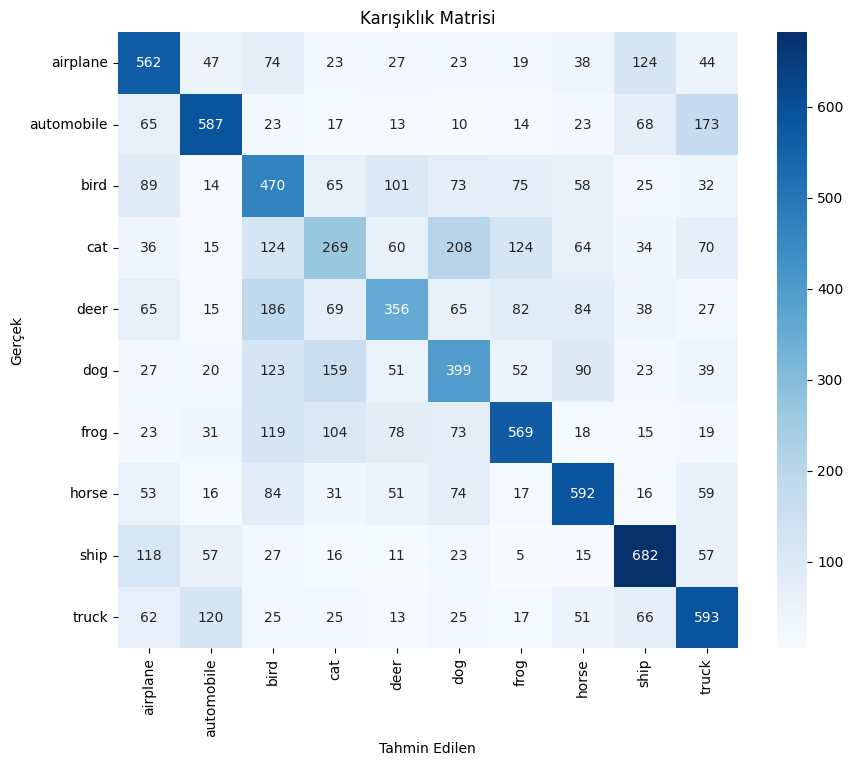

In [ ]:
# Karışıklık Matrisi (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Test verileri ve tahmin sonuçları ile metrikleri hesaplayın
report = classification_report(y_test, y_pred_classes)

# Metrik raporunu yazdırın
print("Sınıflandırma Raporu:")
print(report)


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       981
           1       0.64      0.59      0.61       993
           2       0.37      0.47      0.42      1002
           3       0.35      0.27      0.30      1004
           4       0.47      0.36      0.41       987
           5       0.41      0.41      0.41       983
           6       0.58      0.54      0.56      1049
           7       0.57      0.60      0.58       993
           8       0.63      0.67      0.65      1011
           9       0.53      0.59      0.56       997

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



Katman Sayyısını 3'den 6'yya cıkarıp learning rate degistirdim

epoch sayısını 20 den 30 a cıkardım


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# CIFAR-10 veri setini yükleyin ve ön işleyin
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Verileri numpy dizilerine dönüştürün
train_data = next(iter(trainloader))
test_data = next(iter(testloader))

X, y = train_data
X = X.view(X.size(0), -1).numpy()
y = y.numpy()


In [ ]:
# Veriyi eğitim ve test kümelerine ayırın (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# MLP sınıflandırıcıyı oluşturun
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Modeli derleyin
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Modeli eğitin
model.fit(X_train, y_train_cat, epochs=30, batch_size=64, verbose=1)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0984 - loss: 2.3274
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0953 - loss: 2.3028
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1001 - loss: 2.3028
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1006 - loss: 2.3026
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1011 - loss: 2.3026
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0998 - loss: 2.3027
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0993 - loss: 2.3027
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1011 - loss: 2.3027
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0999 - loss: 2.3026
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1002 - loss: 2.3028
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1009 - loss: 2.3026
Epoch 12/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
from sklearn.metrics import classification_report

# Test verileri ve tahmin sonuçları ile metrikleri hesaplayın
report = classification_report(y_test, y_pred_classes)

# Metrik raporunu yazdırın
print("Sınıflandırma Raporu:")
print(report)


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.10      0.11      0.10      1004
           1       0.11      0.10      0.11       982
           2       0.09      0.12      0.10       999
           3       0.08      0.07      0.07       978
           4       0.09      0.07      0.08       998
           5       0.09      0.08      0.09      1022
           6       0.11      0.10      0.11      1004
           7       0.11      0.11      0.11      1017
           8       0.12      0.13      0.12      1011
           9       0.11      0.12      0.12       985

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



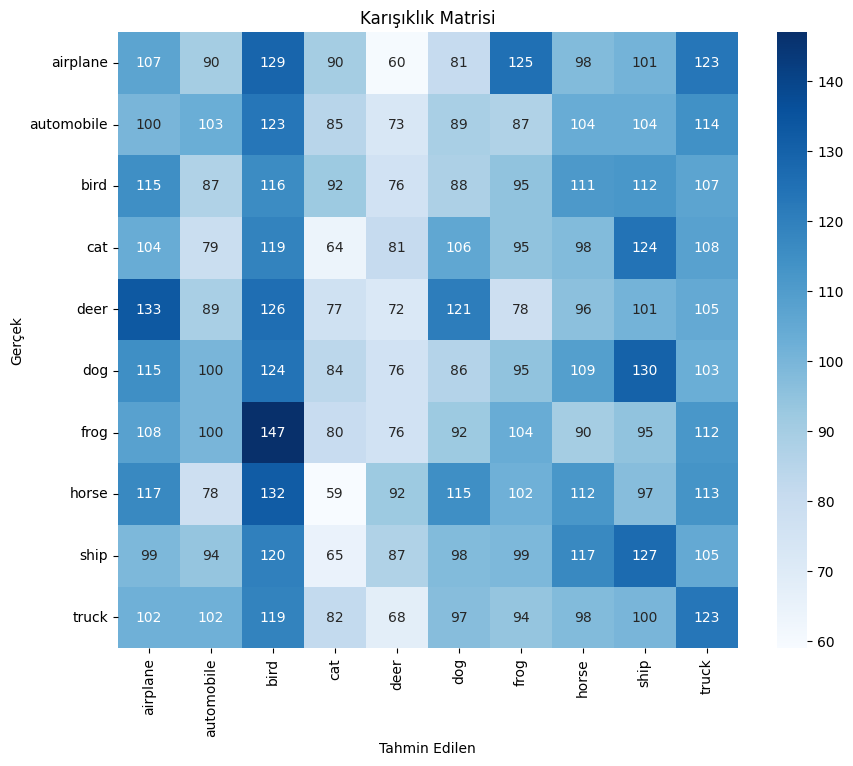

In [ ]:
# Karışıklık Matrisi (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

## Katman Sayısını 3 den 6 ya cıkardık bu sebeple overfitting yapıp metrikler düştü

In [ ]:
pip install --upgrade tensorflow scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
pip install scikeras


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Veri setini yükleyin ve bölün
digits = load_digits()
X = digits.data
y = digits.target

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirin
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kategorik verileri one-hot encode yapın
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# MLP modelini oluşturan bir fonksiyon
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# KerasClassifier sarmalayıcısı
model = KerasClassifier(model=create_model, verbose=0, optimizer='adam', activation='relu', epochs=10, batch_size=32)

# Hiperparametre ızgarası
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20],
    'model__optimizer': ['adam', 'sgd'],  # 'model__' prefix kullanılmalı
    'model__activation': ['relu', 'tanh'] # 'model__' prefix kullanılmalı
}

# GridSearchCV kullanımı
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train_cat)

# En iyi parametreler ve sonuçları
print("En iyi: %f kullanılarak %s" % (grid_result.best_score_, grid_result.best_params_))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


En iyi: 0.969381 kullanılarak {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__optimizer': 'adam'}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi ölçeklendirin (0-255 aralığını 0-1'e çekme)
scaler = StandardScaler()
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# MLP modeli
model = Sequential()
model.add(Dense(1024, input_dim=32*32*3, activation='relu'))
model.add(Dropout(0.4))  # Dropout ile overfitting azaltılır
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Çıkış katmanı

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping ile eğitim
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model eğitimi
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Eğitim verisinin %20'si doğrulama için kullanılacak
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Test doğruluğunu hesaplama
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.1618 - loss: 2.2490 - val_accuracy: 0.2605 - val_loss: 1.9742
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2259 - loss: 2.0283 - val_accuracy: 0.2709 - val_loss: 1.9578
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2589 - loss: 1.9625 - val_accuracy: 0.3042 - val_loss: 1.9050
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2762 - loss: 1.9266 - val_accuracy: 0.2983 - val_loss: 1.9568
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2841 - loss: 1.9211 - val_accuracy: 0.3271 - val_loss: 1.8954
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2943 - loss: 1.9062 - val_accuracy: 0.3244 - val_loss: 1.8754
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2959 - loss: 1.8851 - val_accuracy: 0.3396 - val_loss: 1.8534
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3030 - loss: 1.8876 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2504 - loss: 2.0371 - val_accuracy: 0.3464 - val_loss: 1.8178
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3753 - loss: 1.7346 - val_accuracy: 0.3891 - val_loss: 1.6965
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4066 - loss: 1.6450 - val_accuracy: 0.4055 - val_loss: 1.6640
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4255 - loss: 1.5897 - val_accuracy: 0.4394 - val_loss: 1.5732
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4471 - loss: 1.5443 - val_accuracy: 0.4329 - val_loss: 1.5866
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4633 - loss: 1.5010 - val_accuracy: 0.4512 - val_loss: 1.5451
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4695 - loss: 1.4792 - val_accuracy: 0.4588 - val_loss: 1.5211
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4795 - loss: 1.4395 - val_accuracy: 0

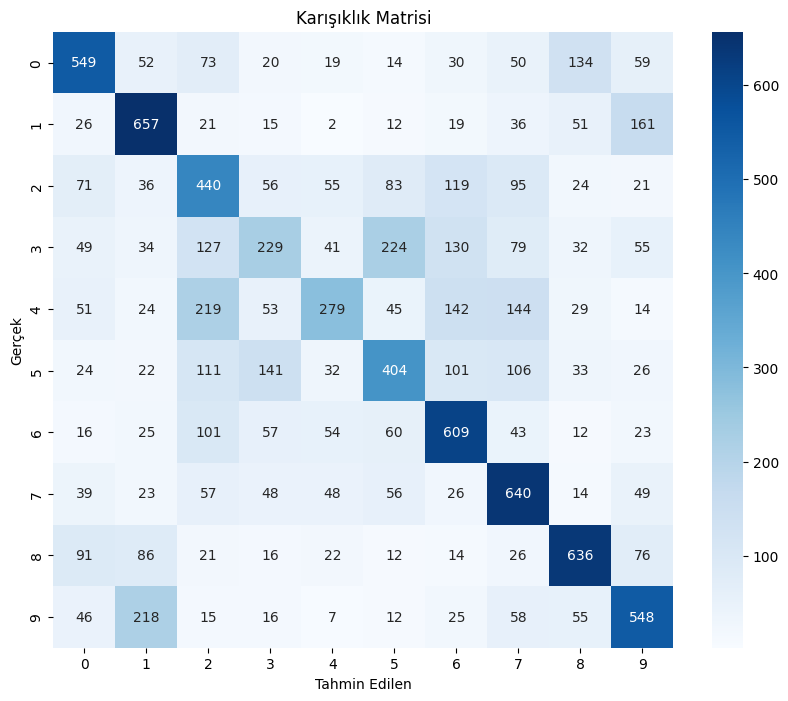

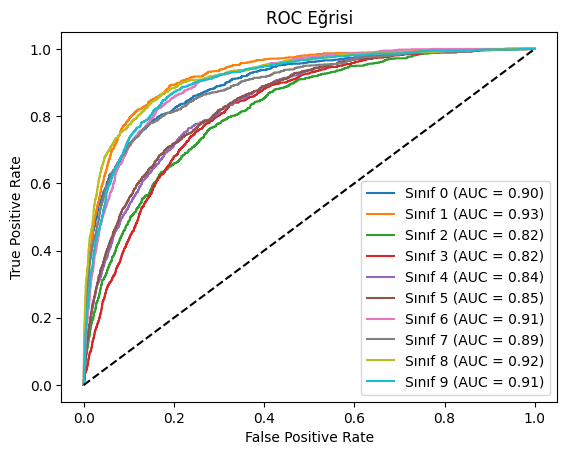

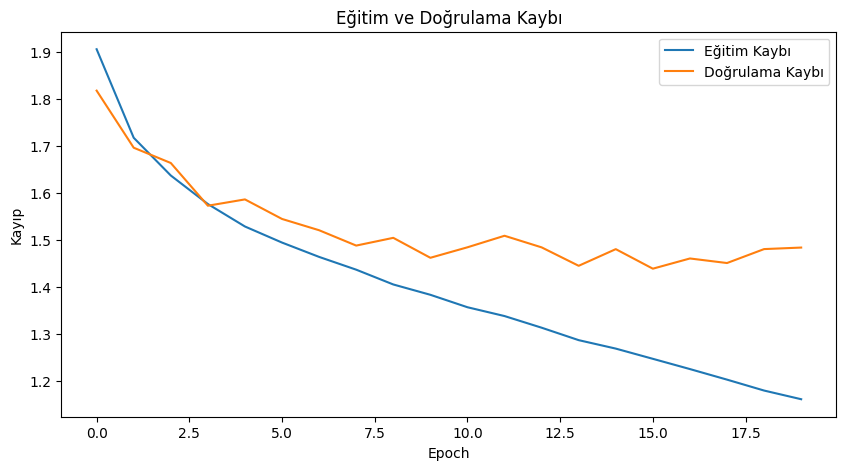

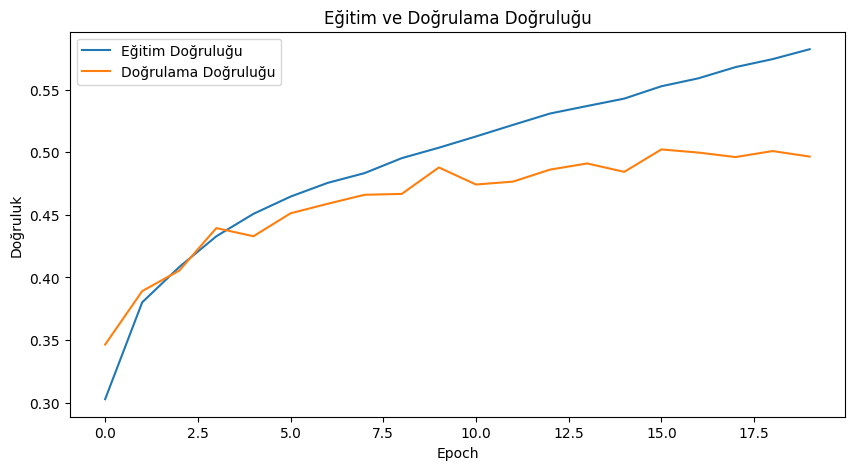

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CIFAR-10 veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi ölçeklendirin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# MLP modeli
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Modeli derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitin
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64, verbose=1, validation_split=0.2)

# Tahmin yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Performans Metrikleri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# ROC Eğrisi ve AUC Skoru
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test_cat[:, i], y_pred[:, i])

plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f"Sınıf {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# Eğitim ve Doğrulama Kayıpları
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1902 - loss: 2.2574 - val_accuracy: 0.3056 - val_loss: 1.8978
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2948 - loss: 1.9985 - val_accuracy: 0.3160 - val_loss: 1.8435
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3149 - loss: 1.9397 - val_accuracy: 0.3492 - val_loss: 1.7893
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3318 - loss: 1.8998 - val_accuracy: 0.3641 - val_loss: 1.7855
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3362 - loss: 1.8893 - val_accuracy: 0.3662 - val_loss: 1.7466
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3498 - loss: 1.8551 - val_accuracy: 0.3847 - val_loss: 1.7272
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 1.8518 - val_accuracy: 0.3849 - val_loss: 1.7355
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3652 - loss: 1.8305 - val_accuracy: 0.

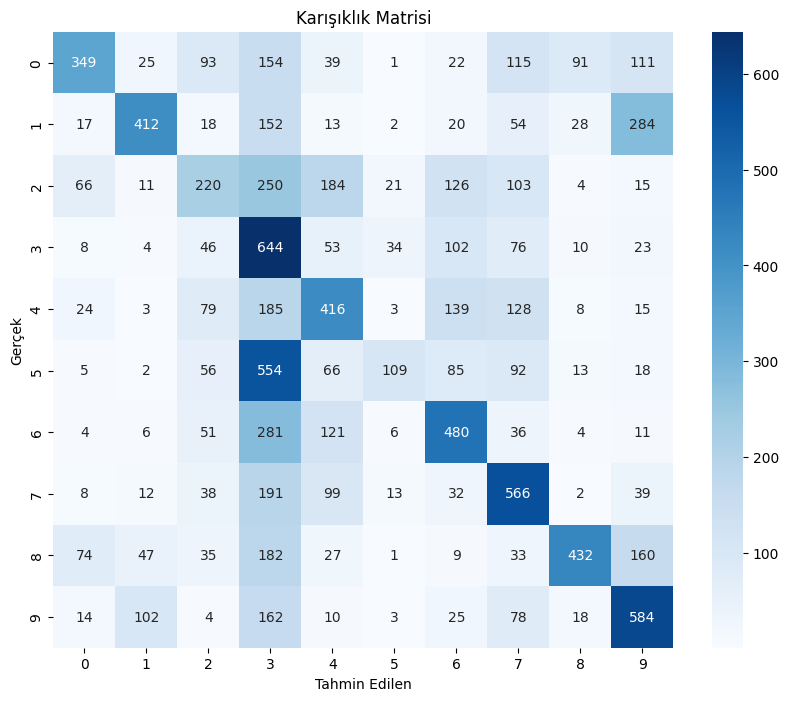

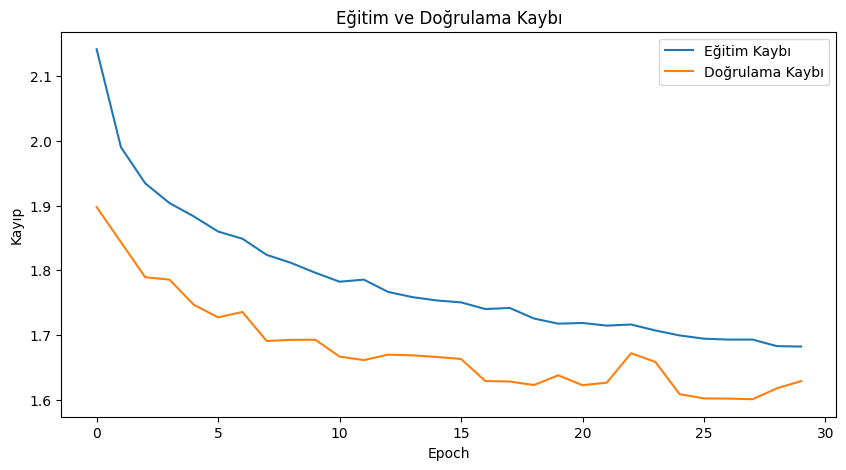

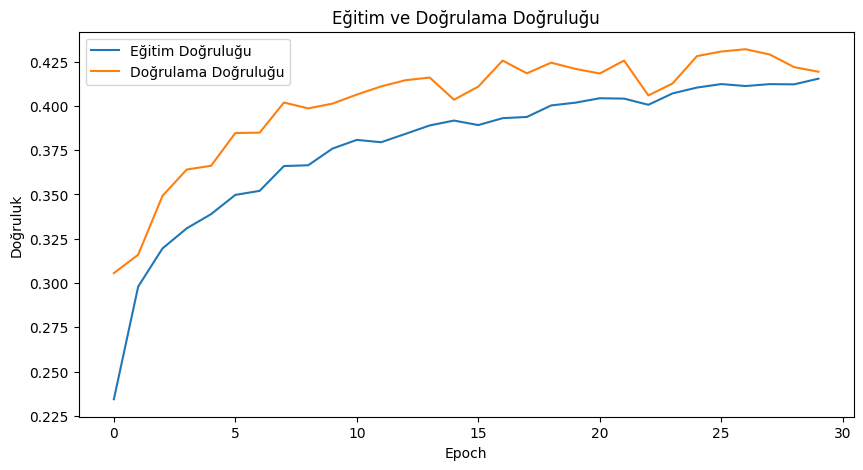

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CIFAR-10 veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi ölçeklendirin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Veri sınıf ağırlıkları (örnek olarak sınıf 3'ün ağırlığı artırıldı)
class_weights = {i: 1.0 for i in range(10)}
class_weights[3] = 1.5  # Sınıf 3'ün ağırlığını artırdık

# MLP modeli
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitin
history = model.fit(
    X_train, y_train_cat,
    epochs=30, batch_size=64, verbose=1,
    validation_split=0.2,
    class_weight=class_weights  # Sınıf ağırlıklarını dahil ettik
)

# Tahmin yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Performans Metrikleri
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Eğitim ve Doğrulama Kayıpları
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1852 - loss: 2.3980 - val_accuracy: 0.3215 - val_loss: 1.8811
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2997 - loss: 2.1231 - val_accuracy: 0.3368 - val_loss: 1.8151
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3354 - loss: 2.0378 - val_accuracy: 0.3603 - val_loss: 1.7667
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3480 - loss: 2.0088 - val_accuracy: 0.3996 - val_loss: 1.6780
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3638 - loss: 1.9549 - val_accuracy: 0.4171 - val_loss: 1.6570
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3777 - loss: 1.9330 - val_accuracy: 0.4176 - val_loss: 1.6618
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3838 - loss: 1.8971 - val_accuracy: 0.4053 - val_loss: 1.6459
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3952 - loss: 1.8816 - val_accuracy: 0.

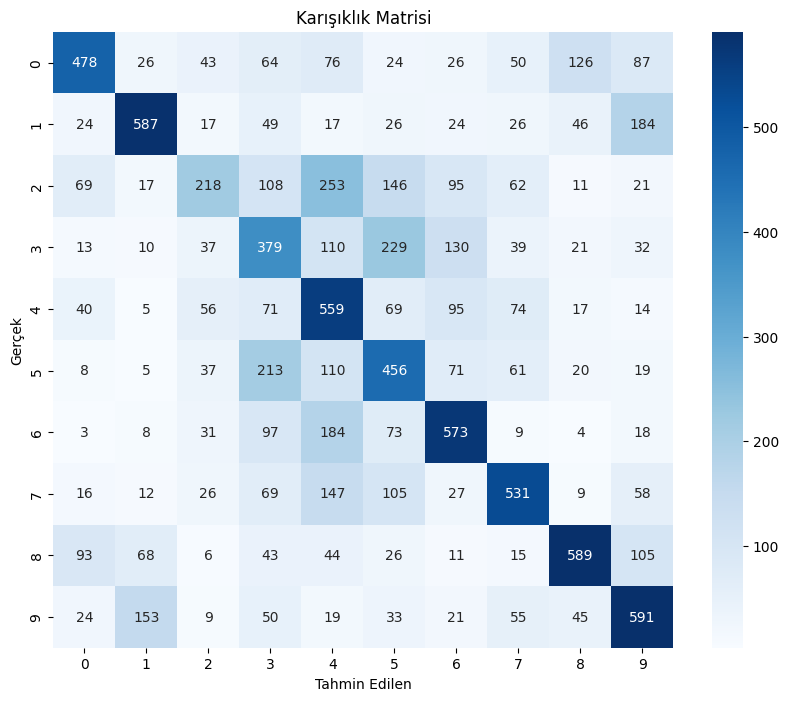

In [ ]:
# CIFAR-10 veri seti için MLP modeli
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri yükleme ve ölçeklendirme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Sınıf ağırlıkları
class_weights = {i: 1.0 for i in range(10)}
class_weights[3] = 1.5  # Örneğin, sınıf 3'ün ağırlığını artırdık
class_weights[5] = 1.8  # Sınıf 5 için daha yüksek ağırlık verdik

# Model oluşturma
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Model eğitimi
history = model.fit(
    X_train, y_train_cat,
    epochs=50, batch_size=64, verbose=1,
    validation_split=0.2,
    class_weight=class_weights
)

# Tahmin yapma ve performans değerlendirme
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1918 - loss: 2.7740 - val_accuracy: 0.3398 - val_loss: 1.8577
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2971 - loss: 2.2088 - val_accuracy: 0.3713 - val_loss: 1.7730
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3198 - loss: 2.0904 - val_accuracy: 0.3818 - val_loss: 1.7230
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3403 - loss: 2.0040 - val_accuracy: 0.3937 - val_loss: 1.6979
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3517 - loss: 1.9640 - val_accuracy: 0.3970 - val_loss: 1.6794
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3624 - loss: 1.9262 - val_accuracy: 0.4044 - val_loss: 1.6726
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3702 - loss: 1.9079 - val_accuracy: 0.4104 - val_loss: 1.6549
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3780 - loss: 1.8797 - val_accuracy: 0

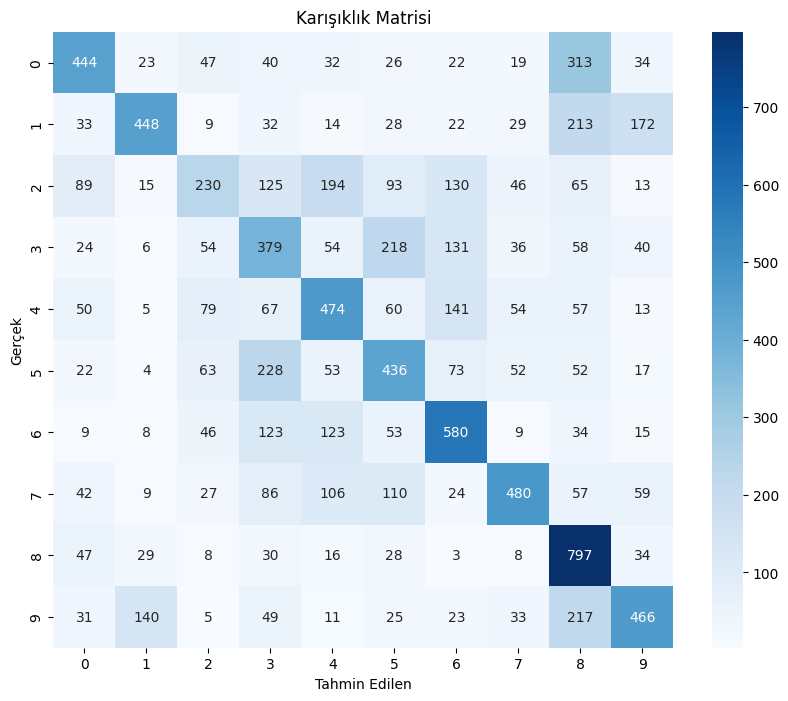

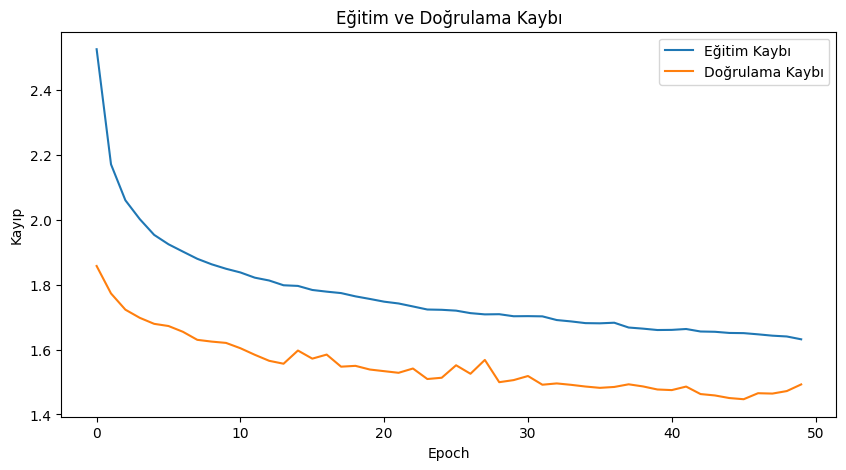

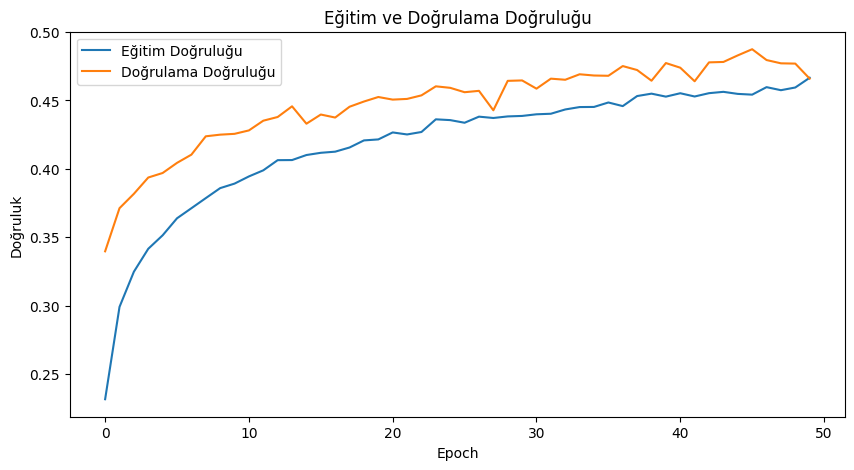

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi normalize edin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Veri Augmentasyonu
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train.reshape(-1, 32, 32, 3))

# Sınıf ağırlıkları
class_weights = {i: 1.0 for i in range(10)}
class_weights[3] = 1.4
class_weights[5] = 1.5

# Yeni MLP modeli
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitin
history = model.fit(
    X_train, y_train_cat,
    epochs=50, batch_size=128, verbose=1,
    validation_split=0.2,
    class_weight=class_weights
)

# Tahmin yapma ve performans analizi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Eğitim ve Doğrulama Kayıpları
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2193 - loss: 2.9261 - val_accuracy: 0.3557 - val_loss: 1.8588
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3044 - loss: 2.3671 - val_accuracy: 0.3860 - val_loss: 1.7581
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3314 - loss: 2.2089 - val_accuracy: 0.4125 - val_loss: 1.6724
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3532 - loss: 2.1191 - val_accuracy: 0.4119 - val_loss: 1.6746
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3646 - loss: 2.0374 - val_accuracy: 0.4150 - val_loss: 1.6438
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3755 - loss: 1.9825 - val_accuracy: 0.4389 - val_loss: 1.5937
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3877 - loss: 1.9461 - val_accuracy: 0.4362 - val_loss: 1.5949
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3991 - loss: 1.9023 - val_accuracy: 0

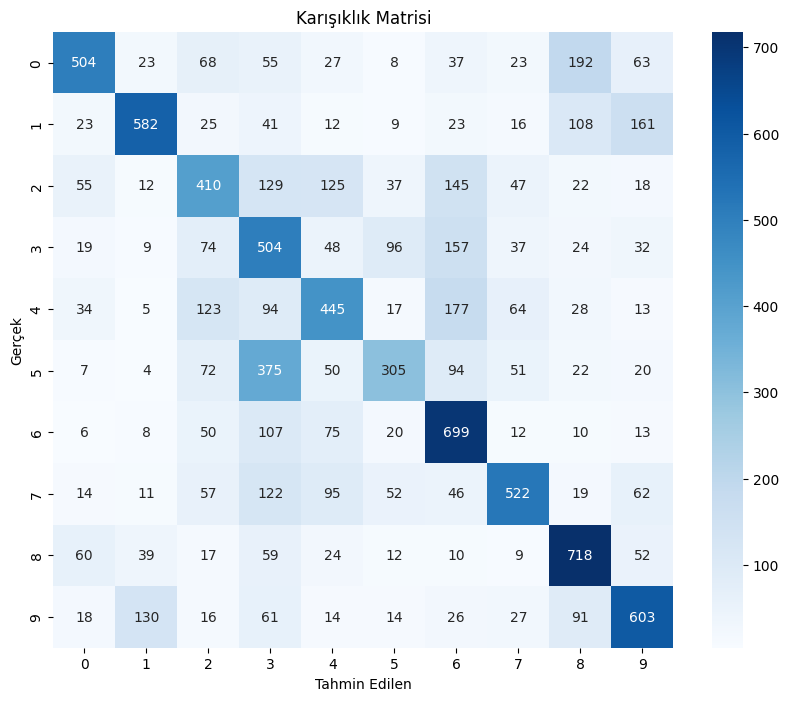

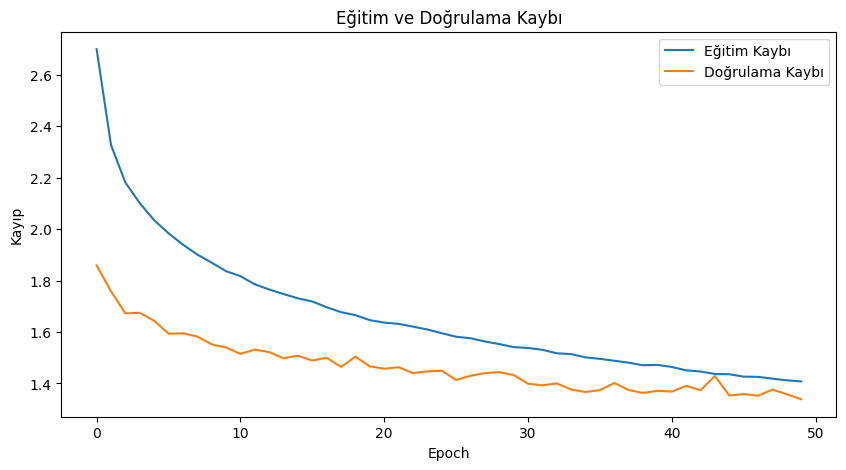

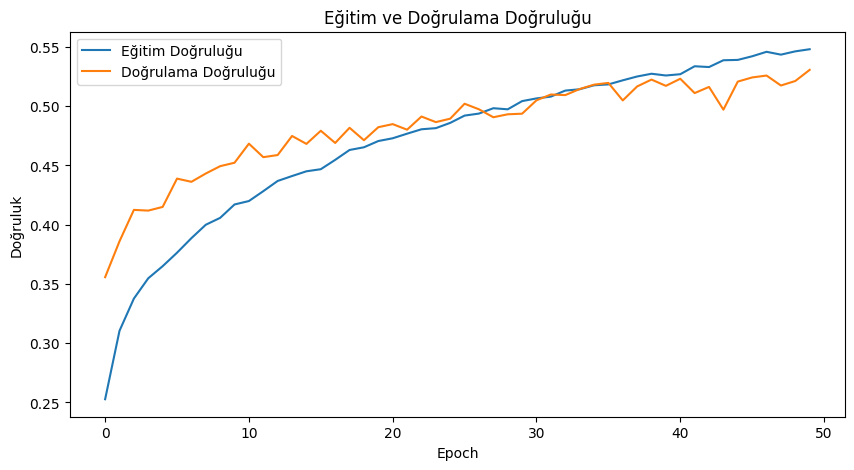

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veriyi normalize edin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Sınıf ağırlıkları
class_weights = {i: 1.0 for i in range(10)}
class_weights[2] = 1.5
class_weights[3] = 1.6

# Yeni MLP modeli
model = Sequential([
    Dense(1024, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitin
history = model.fit(
    X_train, y_train_cat,
    epochs=50, batch_size=128, verbose=1,
    validation_split=0.2,
    class_weight=class_weights
)

# Tahmin yapma ve performans analizi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))

# Karışıklık Matrisi
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

# Eğitim ve Doğrulama Kayıpları
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Veriyi normalize edin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Focal loss fonksiyonu
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_sum(weight * cross_entropy, axis=-1)
    return focal_loss_fixed

# Yeni MLP modeli
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1024),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=focal_loss(alpha=0.25, gamma=2.0),
              metrics=['accuracy'])

# Model eğitimi
history = model.fit(
    X_train, y_train_cat,
    epochs=50, batch_size=128, verbose=1,
    validation_split=0.2
)

# Tahmin yapma ve performans analizi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2175 - loss: 0.5594 - val_accuracy: 0.3362 - val_loss: 0.3414
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3016 - loss: 0.4248 - val_accuracy: 0.3888 - val_loss: 0.3242
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3296 - loss: 0.3857 - val_accuracy: 0.3923 - val_loss: 0.3137
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3318 - loss: 0.3676 - val_accuracy: 0.4065 - val_loss: 0.2987
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3643 - loss: 0.3405 - val_accuracy: 0.4226 - val_loss: 0.2919
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3708 - loss: 0.3325 - val_accuracy: 0.4196 - val_loss: 0.2935
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3818 - loss: 0.3206 - val_accuracy: 0.4436 - val_loss: 0.2759
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3923 - loss: 0.3111 - val_accuracy: 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Veriyi normalize edin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Sınıf ağırlıkları (zor sınıfları daha fazla ağırlıklandırdık)
class_weights = {i: 1.0 for i in range(10)}
class_weights[3] = 1.5  # Sınıf 3 için ağırlığı artırdık
class_weights[5] = 1.5  # Sınıf 5 için ağırlığı artırdık

# Yeni MLP modeli
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1024),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Öğrenme oranını düşürme için scheduler (plateau'da durduğunda öğrenme oranını azaltır)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli eğitme
history = model.fit(
    X_train, y_train_cat,
    epochs=100, batch_size=128, verbose=1,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[lr_scheduler]
)

# Tahmin yapma ve performans analizi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2521 - loss: 2.5530 - val_accuracy: 0.3412 - val_loss: 1.8545 - learning_rate: 0.0010
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3555 - loss: 2.0010 - val_accuracy: 0.3681 - val_loss: 1.7619 - learning_rate: 0.0010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3999 - loss: 1.8467 - val_accuracy: 0.4317 - val_loss: 1.6056 - learning_rate: 0.0010
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4198 - loss: 1.7810 - val_accuracy: 0.4256 - val_loss: 1.6134 - learning_rate: 0.0010
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4368 - loss: 1.7284 - val_accuracy: 0.4197 - val_loss: 1.6531 - learning_rate: 0.0010
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4557 - loss: 1.6805 - val_accuracy: 0.4418 - val_loss: 1.5961 - learning_rate: 0.0010
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4591 - loss: 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Veriyi normalize edin
X_train = X_train.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype('float32') / 255.0

# Etiketleri one-hot encode yapın
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Focal loss fonksiyonu
def focal_loss(alpha=0.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * tf.math.pow(1 - y_pred, gamma)
        return tf.reduce_sum(weight * cross_entropy, axis=-1)
    return focal_loss_fixed

# Sınıf ağırlıkları (zor sınıfları daha fazla ağırlıklandırdık)
class_weights = {i: 1.0 for i in range(10)}
class_weights[2] = 1.6  # Sınıf 2 için ağırlığı artırdık
class_weights[3] = 1.7  # Sınıf 3 için ağırlığı artırdık
class_weights[5] = 1.5  # Sınıf 5 için ağırlığı artırdık

# Yeni MLP modeli
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1024),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=focal_loss(alpha=0.25, gamma=2.0),
              metrics=['accuracy'])

# Öğrenme oranını düşürme için scheduler (plateau'da durduğunda öğrenme oranını azaltır)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Modeli eğitme
history = model.fit(
    X_train, y_train_cat,
    epochs=100, batch_size=128, verbose=1,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[lr_scheduler]
)

# Tahmin yapma ve performans analizi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2365 - loss: 0.5967 - val_accuracy: 0.3496 - val_loss: 0.3304 - learning_rate: 5.0000e-04
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3271 - loss: 0.4277 - val_accuracy: 0.3563 - val_loss: 0.3259 - learning_rate: 5.0000e-04
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3605 - loss: 0.3799 - val_accuracy: 0.3624 - val_loss: 0.3210 - learning_rate: 5.0000e-04
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3837 - loss: 0.3541 - val_accuracy: 0.4009 - val_loss: 0.2963 - learning_rate: 5.0000e-04
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4016 - loss: 0.3377 - val_accuracy: 0.4259 - val_loss: 0.2807 - learning_rate: 5.0000e-04
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4227 - loss: 0.3243 - val_accuracy: 0.4620 - val_loss: 0.2628 - learning_rate: 5.0000e-04
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

# RBF

In [ ]:
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10

# CIFAR-10 Veri Setini Yükleme
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Verileri normalize etme
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Etiketleri tek boyutlu hale getirme
y_train = y_train.flatten()
y_test = y_test.flatten()

# RBF Modelini Oluşturma
# KMeans kullanarak RBF merkezlerini belirle
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)

# RBF fonksiyonu için Gaussian benzeri bir aktivasyon fonksiyonu
def rbf_layer(X, centers, beta=1.0):
    G = np.exp(-beta * np.linalg.norm(X[:, None] - centers, axis=2) ** 2)
    return G

# Eğitim verisi için RBF katmanı çıktısını oluştur
rbf_X_train = rbf_layer(X_train, kmeans.cluster_centers_)
rbf_X_test = rbf_layer(X_test, kmeans.cluster_centers_)

# Etiketleri one-hot encode yapma
y_train_onehot = to_categorical(y_train, num_classes=10)

y_test_onehot = to_categorical(y_test, num_classes=10)

# RBF Katmanı Sonrası Bir MLP Kullanarak Modeli Tamamlama
rbf_model = Sequential()
rbf_model.add(Input(shape=(rbf_X_train.shape[1],)))
rbf_model.add(Dense(10, activation='relu'))  # Bu katmanda aktivasyon ve nöron sayısını değiştirebilirsiniz
rbf_model.add(Dense(10, activation='softmax'))  # Son katman: sınıf sayısı kadar nöron (10)

# Modeli Derleme
rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli Eğitme
rbf_model.fit(rbf_X_train, y_train_onehot, epochs=20, validation_split=0.2, verbose=1)

# RBF Modeli Performans Değerlendirmesi
rbf_y_pred = rbf_model.predict(rbf_X_test)
rbf_y_pred_labels = np.argmax(rbf_y_pred, axis=1)

# Confusion Matrix
t = confusion_matrix(y_test, rbf_y_pred_labels)
plt.figure(figsize=(10, 6))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Performans Metriklerini Hesaplama
accuracy = accuracy_score(y_test, rbf_y_pred_labels)
precision = precision_score(y_test, rbf_y_pred_labels, average='weighted')
recall = recall_score(y_test, rbf_y_pred_labels, average='weighted')
f1 = f1_score(y_test, rbf_y_pred_labels, average='weighted')

# Performans Sonuçlarını Yazdırma
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Hassasiyet (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")

# Confusion Matrix'in Görselleştirilmesi
conf_matrix = confusion_matrix(y_test, rbf_y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

### Kmeans cluster sayısı 100 ve 50 de Colab Pro A100 Gpu coktu. Cluster sayısını 10 yapınca accuracy 0.0952 oldu

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step

--- Detaylı Performans Metrikleri ---
Genel Doğruluk (Accuracy): 0.4310

Precision Skorları:
Micro Precision: 0.4310
Macro Precision: 0.4215
Weighted Precision: 0.4265

Recall Skorları:
Micro Recall: 0.4310
Macro Recall: 0.4260
Weighted Recall: 0.4310

F1 Skorları:
Micro F1: 0.4310
Macro F1: 0.4207
Weighted F1: 0.4256

Sınıf Bazında Metrikler:
              precision    recall  f1-score   support

    airplane       0.46      0.45      0.45       103
  automobile       0.51      0.58      0.55        89
        bird       0.35      0.33      0.34       100
         cat       0.29      0.17      0.21       103
        deer       0.21      0.23      0.22        90
         dog       0.30      0.31      0.31        86
        frog       0.46      0.58      0.52       112
       horse       0.53      0.48      0.51       102
        ship       0.61      0.59      0.60       106
       truck       0.48      0.53      0.50       109

   

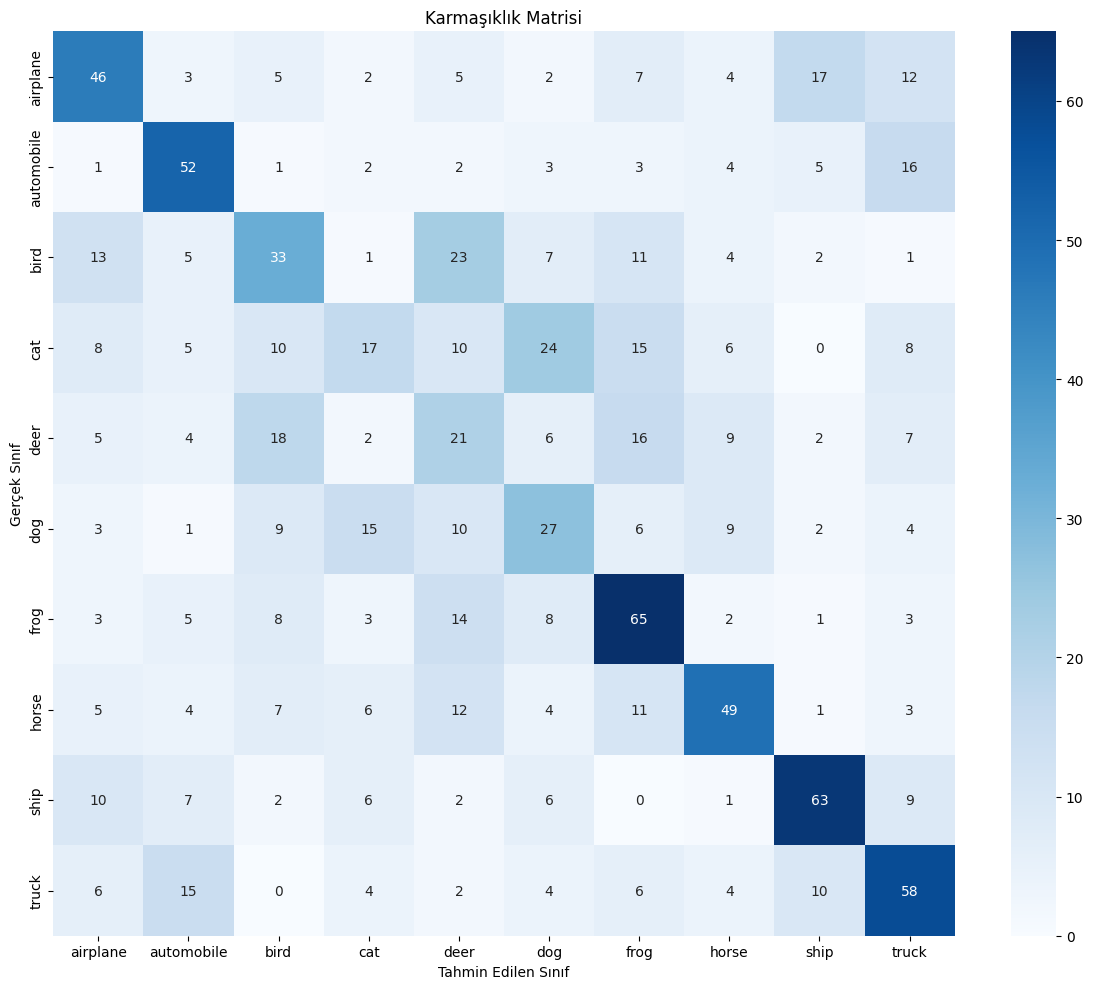

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns

# CIFAR-10 veri setini yükleme
def load_cifar10_data():
    # Keras ile CIFAR-10 yükleme
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Görüntüleri düzleştirme ve 0-255 aralığını 0-1'e normalize etme
    x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

    # Etiketleri düzleştirme
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    return x_train, x_test, y_train, y_test

# Veri ön işleme
def preprocess_data(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled

# RBF SVM modelini eğitme
def train_rbf_svm(x_train, y_train):
    # Bellek ve hesaplama süresi için veri alt kümesi
    x_train_subset, _, y_train_subset, _ = train_test_split(
        x_train, y_train, train_size=5000, random_state=42
    )

    rbf_svm = SVC(kernel='rbf', random_state=42, probability=True)
    rbf_svm.fit(x_train_subset, y_train_subset)
    return rbf_svm

# Detaylı performans metrikleri hesaplama
def calculate_performance_metrics(y_true, y_pred):
    # Sınıf isimleri
    class_names = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]

    # Temel metrikler
    accuracy = accuracy_score(y_true, y_pred)

    # Micro, macro ve weighted ortalama metrikleri
    precision_micro = precision_score(y_true, y_pred, average='micro')
    precision_macro = precision_score(y_true, y_pred, average='macro')
    precision_weighted = precision_score(y_true, y_pred, average='weighted')

    recall_micro = recall_score(y_true, y_pred, average='micro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')

    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    # Detaylı performans raporu
    print("\n--- Detaylı Performans Metrikleri ---")
    print(f"Genel Doğruluk (Accuracy): {accuracy:.4f}")

    print("\nPrecision Skorları:")
    print(f"Micro Precision: {precision_micro:.4f}")
    print(f"Macro Precision: {precision_macro:.4f}")
    print(f"Weighted Precision: {precision_weighted:.4f}")

    print("\nRecall Skorları:")
    print(f"Micro Recall: {recall_micro:.4f}")
    print(f"Macro Recall: {recall_macro:.4f}")
    print(f"Weighted Recall: {recall_weighted:.4f}")

    print("\nF1 Skorları:")
    print(f"Micro F1: {f1_micro:.4f}")
    print(f"Macro F1: {f1_macro:.4f}")
    print(f"Weighted F1: {f1_weighted:.4f}")

    # Her sınıf için ayrıntılı metrikler
    print("\nSınıf Bazında Metrikler:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Karmaşıklık matrisini görselleştirme
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Karmaşıklık Matrisi')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.ylabel('Gerçek Sınıf')
    plt.tight_layout()
    plt.show()

# Ana çalıştırma fonksiyonu
def main():
    # Veri setini yükleme
    x_train, x_test, y_train, y_test = load_cifar10_data()

    # Veri önişleme
    x_train_scaled, x_test_scaled = preprocess_data(x_train, x_test)

    # Modeli eğitme
    rbf_svm_model = train_rbf_svm(x_train_scaled, y_train)

    # Tahminleri yapma
    y_pred = rbf_svm_model.predict(x_test_scaled[:1000])  # Bellek için alt küme

    # Performans metriklerini hesaplama
    calculate_performance_metrics(y_test[:1000], y_pred)

# Kodu çalıştırma
if __name__ == '__main__':
    main()


=== Genel Performans Metrikleri ===
Accuracy: 0.4310
Precision (Micro): 0.4310
Precision (Macro): 0.4215
Precision (Weighted): 0.4265
Recall (Micro): 0.4310
Recall (Macro): 0.4260
Recall (Weighted): 0.4310
F1-Score (Micro): 0.4310
F1-Score (Macro): 0.4207
F1-Score (Weighted): 0.4256


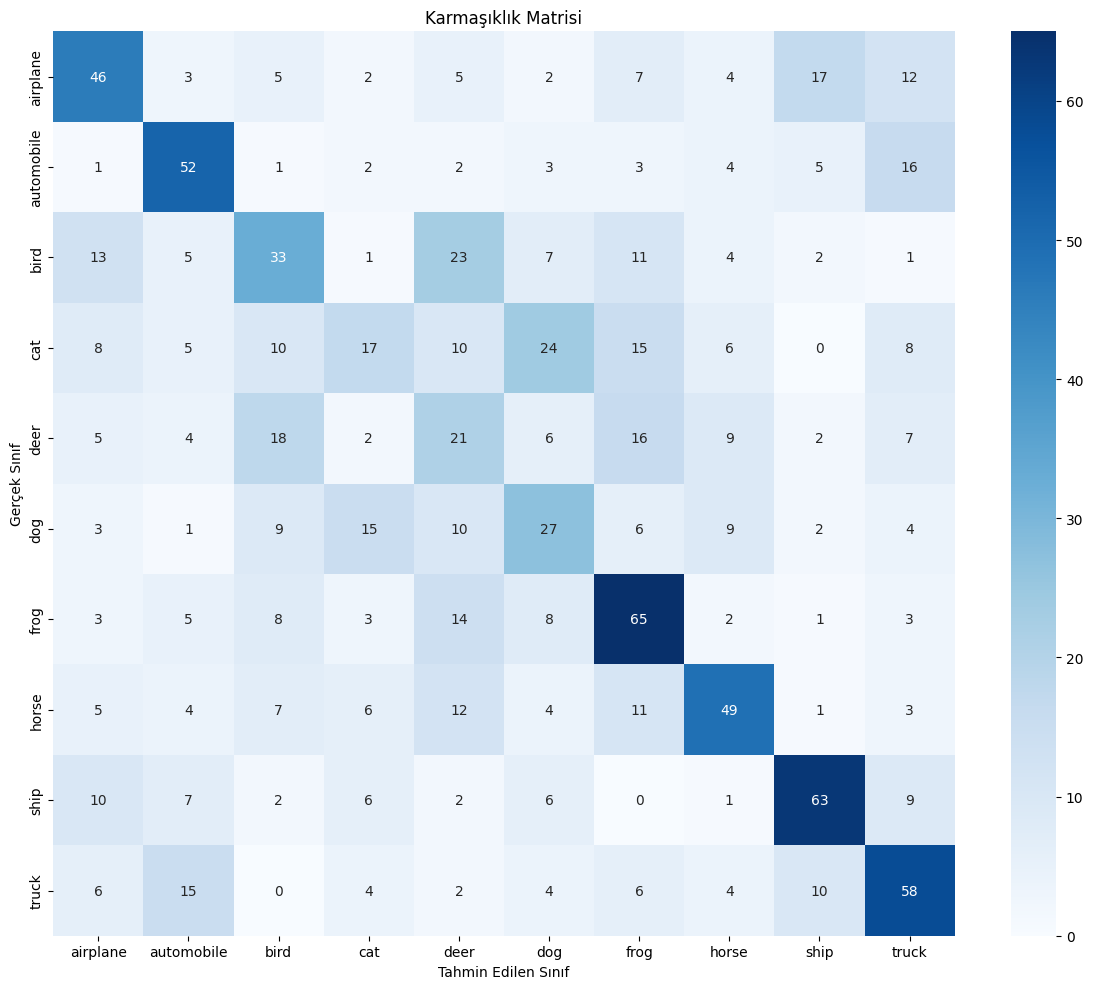


=== Detaylı Sınıflandırma Raporu ===
              precision    recall  f1-score   support

    airplane       0.46      0.45      0.45       103
  automobile       0.51      0.58      0.55        89
        bird       0.35      0.33      0.34       100
         cat       0.29      0.17      0.21       103
        deer       0.21      0.23      0.22        90
         dog       0.30      0.31      0.31        86
        frog       0.46      0.58      0.52       112
       horse       0.53      0.48      0.51       102
        ship       0.61      0.59      0.60       106
       truck       0.48      0.53      0.50       109

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.43      0.43      0.43      1000


=== Sınıf Bazında Performans Metrikleri ===

airplane:
  Precision: 0.4600
  Recall: 0.4466
  F1-Score: 0.4532

automobile:
  Precision: 0.5149
  Recall: 0.5843
  F1-Score: 0.5474

bird:
  Precision: 0.

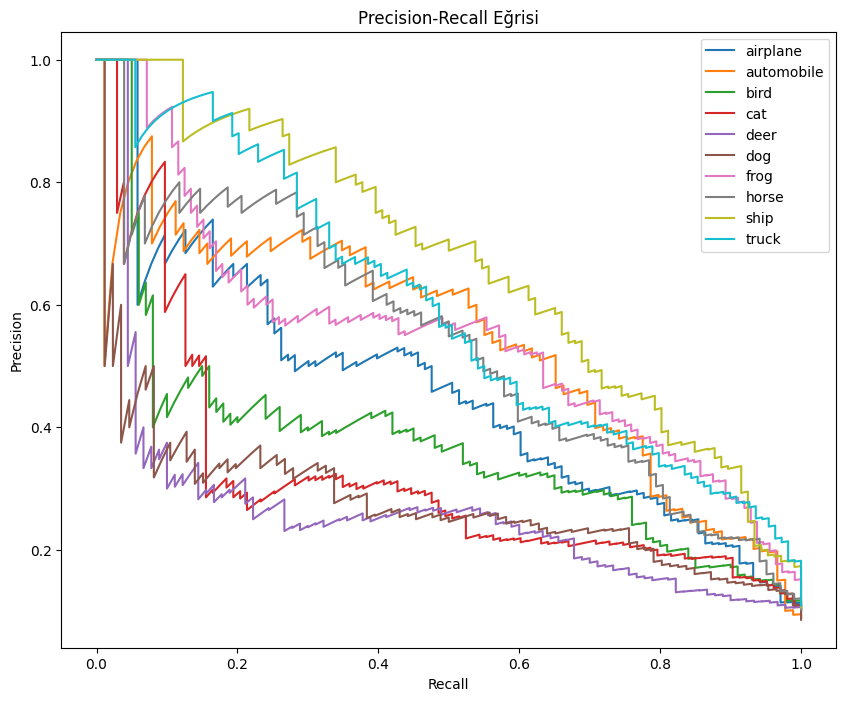

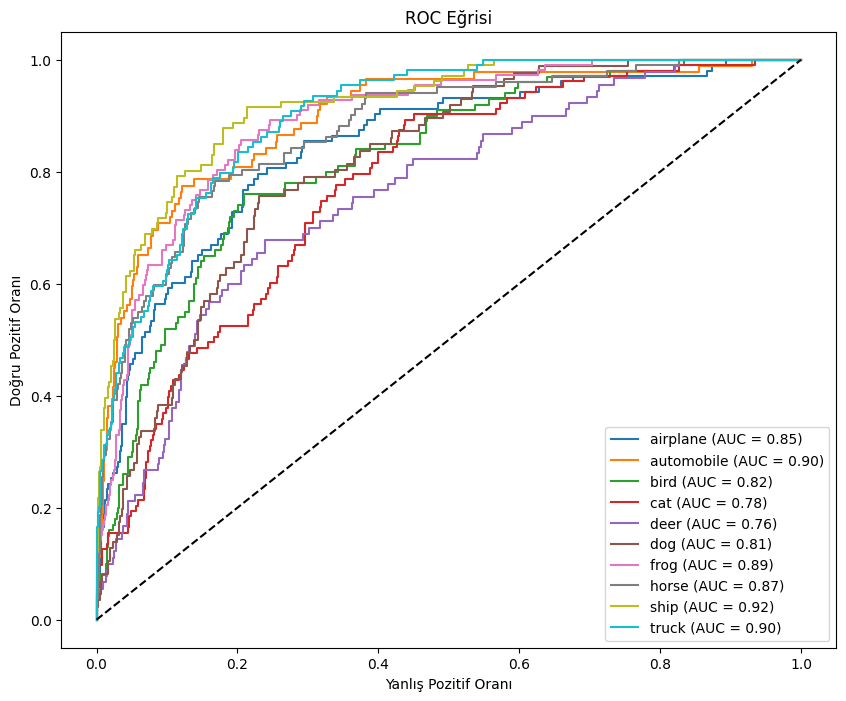

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)

class CIFARPerformanceEvaluator:
    def __init__(self, y_true, y_pred, y_prob=None, class_names=None):
        """
        CIFAR-10 için performans değerlendirme sınıfı

        Parameters:
        - y_true: Gerçek etiketler
        - y_pred: Model tahminleri
        - y_prob: Sınıf olasılıkları (opsiyonel)
        - class_names: Sınıf isimleri
        """
        self.y_true = y_true
        self.y_pred = y_pred
        self.y_prob = y_prob
        self.class_names = class_names or [
            'airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck'
        ]

    def compute_overall_metrics(self):
        """
        Genel performans metriklerini hesaplama
        """
        metrics = {
            'Accuracy': accuracy_score(self.y_true, self.y_pred),

            'Precision (Micro)': precision_score(self.y_true, self.y_pred, average='micro'),
            'Precision (Macro)': precision_score(self.y_true, self.y_pred, average='macro'),
            'Precision (Weighted)': precision_score(self.y_true, self.y_pred, average='weighted'),

            'Recall (Micro)': recall_score(self.y_true, self.y_pred, average='micro'),
            'Recall (Macro)': recall_score(self.y_true, self.y_pred, average='macro'),
            'Recall (Weighted)': recall_score(self.y_true, self.y_pred, average='weighted'),

            'F1-Score (Micro)': f1_score(self.y_true, self.y_pred, average='micro'),
            'F1-Score (Macro)': f1_score(self.y_true, self.y_pred, average='macro'),
            'F1-Score (Weighted)': f1_score(self.y_true, self.y_pred, average='weighted')
        }

        print("\n=== Genel Performans Metrikleri ===")
        for name, value in metrics.items():
            print(f"{name}: {value:.4f}")

        return metrics

    def plot_confusion_matrix(self):
        """
        Karmaşıklık matrisini görselleştirme
        """
        cm = confusion_matrix(self.y_true, self.y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=self.class_names,
            yticklabels=self.class_names
        )
        plt.title('Karmaşıklık Matrisi')
        plt.xlabel('Tahmin Edilen Sınıf')
        plt.ylabel('Gerçek Sınıf')
        plt.tight_layout()
        plt.show()

    def detailed_classification_report(self):
        """
        Detaylı sınıflandırma raporu
        """
        print("\n=== Detaylı Sınıflandırma Raporu ===")
        print(classification_report(
            self.y_true,
            self.y_pred,
            target_names=self.class_names
        ))

    def per_class_metrics(self):
        """
        Her sınıf için ayrıntılı metrikler
        """
        print("\n=== Sınıf Bazında Performans Metrikleri ===")
        for i, class_name in enumerate(self.class_names):
            # Bir sınıf için ikili sınıflandırma
            class_true = (self.y_true == i)
            class_pred = (self.y_pred == i)

            precision = precision_score(class_true, class_pred)
            recall = recall_score(class_true, class_pred)
            f1 = f1_score(class_true, class_pred)

            print(f"\n{class_name}:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")

    def plot_precision_recall_curve(self):
        """
        Precision-Recall eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            precision, recall, _ = precision_recall_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            plt.plot(recall, precision, label=self.class_names[i])

        plt.title('Precision-Recall Eğrisi')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

    def plot_roc_curve(self):
        """
        ROC eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            fpr, tpr, _ = roc_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            roc_auc = auc(fpr, tpr)

            plt.plot(
                fpr, tpr,
                label=f'{self.class_names[i]} (AUC = {roc_auc:.2f})'
            )

        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Eğrisi')
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.legend()
        plt.show()

# Örnek kullanım
def run_performance_evaluation(y_true, y_pred, y_prob=None):
    # Performans değerlendiricisi oluşturma
    evaluator = CIFARPerformanceEvaluator(
        y_true,
        y_pred,
        y_prob
    )

    # Tüm analiz metodlarını çağırma
    evaluator.compute_overall_metrics()
    evaluator.plot_confusion_matrix()
    evaluator.detailed_classification_report()
    evaluator.per_class_metrics()

    # Olasılık tahminleri varsa ek analizler
    if y_prob is not None:
        evaluator.plot_precision_recall_curve()
        evaluator.plot_roc_curve()

# Ana fonksiyon
def main():
    from tensorflow.keras.datasets import cifar10
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC

    # Veri setini yükleme
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Görüntüleri düzleştirme ve normalize etme
    x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

    # Etiketleri düzleştirme
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Veri ön işleme
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Alt küme seçimi
    x_train_subset, _, y_train_subset, _ = train_test_split(
        x_train_scaled, y_train, train_size=5000, random_state=42
    )

    # Modeli eğitme
    svm_model = SVC(kernel='rbf', random_state=42, probability=True)
    svm_model.fit(x_train_subset, y_train_subset)

    # Tahminleri yapma
    y_pred = svm_model.predict(x_test_scaled[:1000])
    y_prob = svm_model.predict_proba(x_test_scaled[:1000])

    # Performans değerlendirmesi
    run_performance_evaluation(
        y_test[:1000],
        y_pred,
        y_prob
    )

if __name__ == '__main__':
    main()

Hiperparametreleri degistirerek yeni bir model olusturduk


=== Genel Performans Metrikleri ===
Accuracy: 0.4310
Precision (Micro): 0.4310
Precision (Macro): 0.4215
Precision (Weighted): 0.4265
Recall (Micro): 0.4310
Recall (Macro): 0.4260
Recall (Weighted): 0.4310
F1-Score (Micro): 0.4310
F1-Score (Macro): 0.4207
F1-Score (Weighted): 0.4256


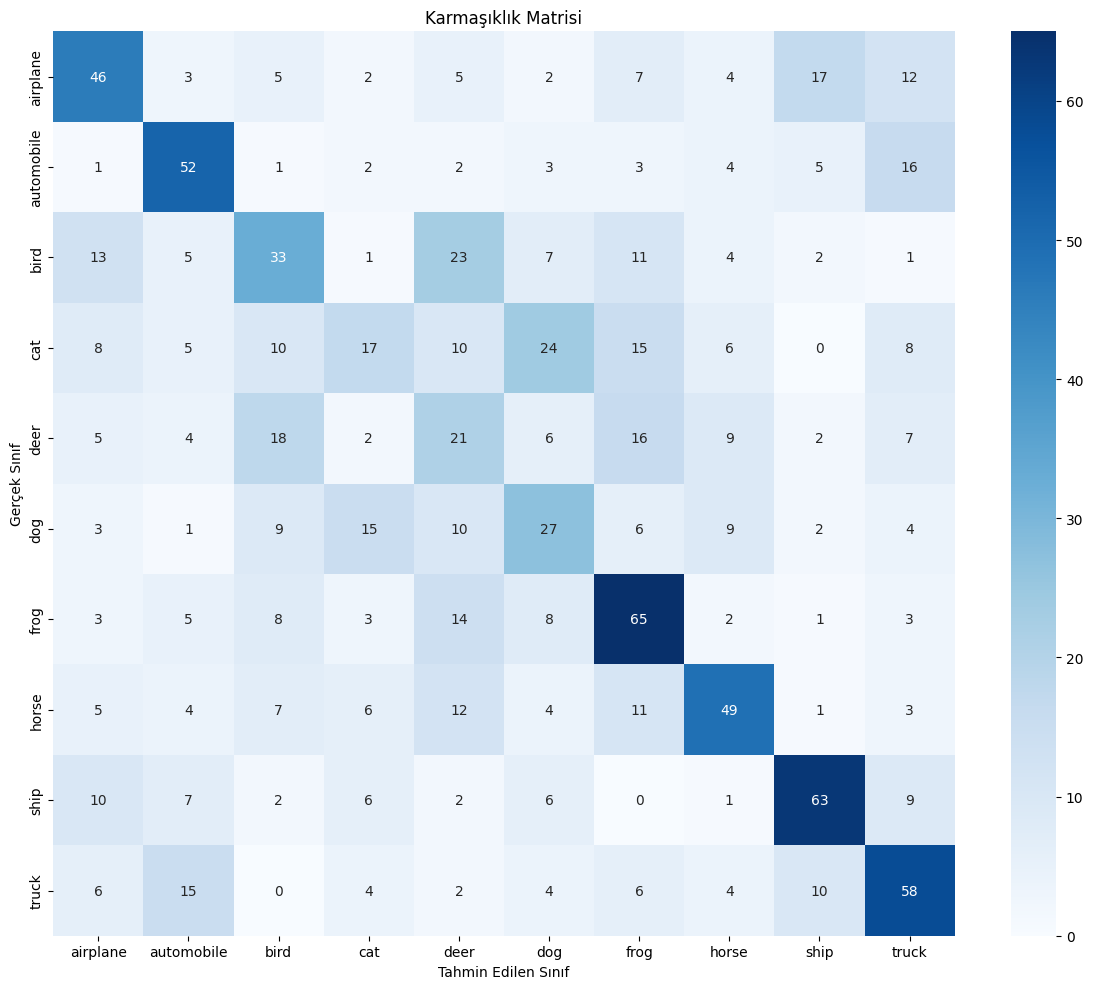


=== Detaylı Sınıflandırma Raporu ===
              precision    recall  f1-score   support

    airplane       0.46      0.45      0.45       103
  automobile       0.51      0.58      0.55        89
        bird       0.35      0.33      0.34       100
         cat       0.29      0.17      0.21       103
        deer       0.21      0.23      0.22        90
         dog       0.30      0.31      0.31        86
        frog       0.46      0.58      0.52       112
       horse       0.53      0.48      0.51       102
        ship       0.61      0.59      0.60       106
       truck       0.48      0.53      0.50       109

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.43      0.43      0.43      1000


=== Sınıf Bazında Performans Metrikleri ===

airplane:
  Precision: 0.4600
  Recall: 0.4466
  F1-Score: 0.4532

automobile:
  Precision: 0.5149
  Recall: 0.5843
  F1-Score: 0.5474

bird:
  Precision: 0.

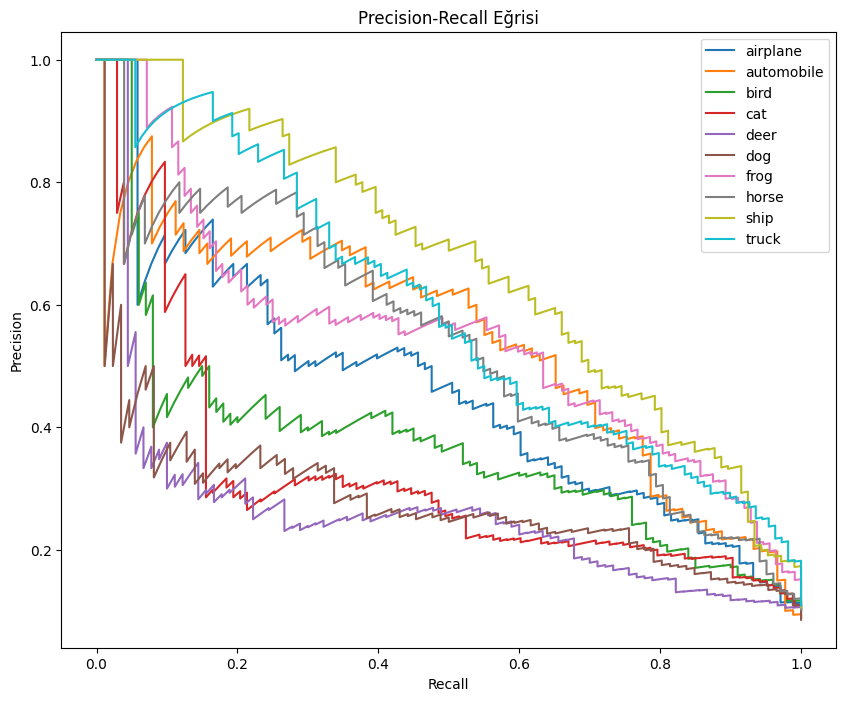

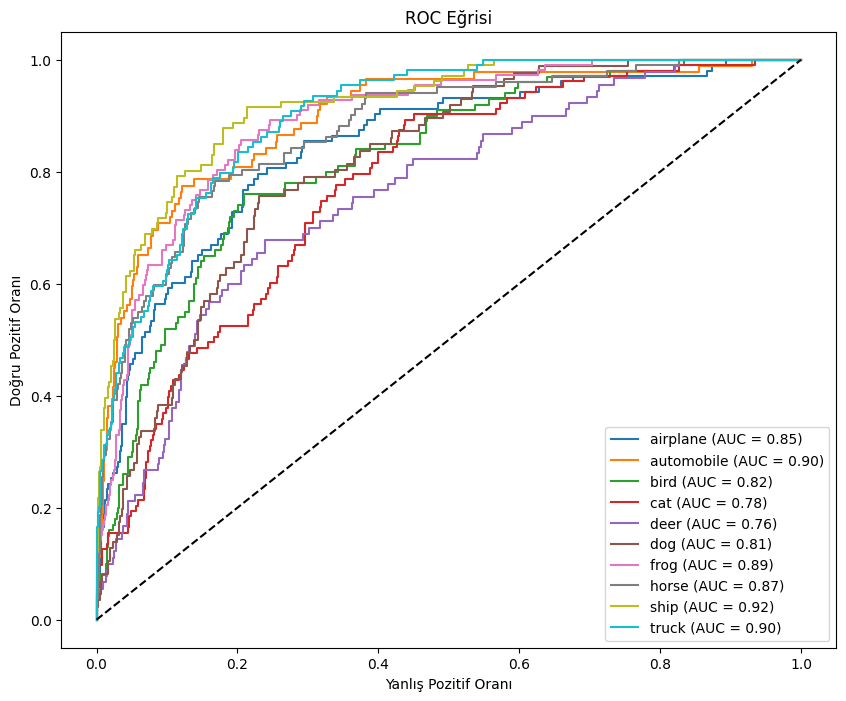

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

class CIFARPerformanceEvaluator:
    def __init__(self, y_true, y_pred, y_prob=None, class_names=None):
        """
        CIFAR-10 için performans değerlendirme sınıfı

        Parameters:
        - y_true: Gerçek etiketler
        - y_pred: Model tahminleri
        - y_prob: Sınıf olasılıkları (opsiyonel)
        - class_names: Sınıf isimleri
        """
        self.y_true = y_true
        self.y_pred = y_pred
        self.y_prob = y_prob
        self.class_names = class_names or [
            'airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck'
        ]

    def compute_overall_metrics(self):
        """
        Genel performans metriklerini hesaplama
        """
        metrics = {
            'Accuracy': accuracy_score(self.y_true, self.y_pred),

            'Precision (Micro)': precision_score(self.y_true, self.y_pred, average='micro'),
            'Precision (Macro)': precision_score(self.y_true, self.y_pred, average='macro'),
            'Precision (Weighted)': precision_score(self.y_true, self.y_pred, average='weighted'),

            'Recall (Micro)': recall_score(self.y_true, self.y_pred, average='micro'),
            'Recall (Macro)': recall_score(self.y_true, self.y_pred, average='macro'),
            'Recall (Weighted)': recall_score(self.y_true, self.y_pred, average='weighted'),

            'F1-Score (Micro)': f1_score(self.y_true, self.y_pred, average='micro'),
            'F1-Score (Macro)': f1_score(self.y_true, self.y_pred, average='macro'),
            'F1-Score (Weighted)': f1_score(self.y_true, self.y_pred, average='weighted')
        }

        print("\n=== Genel Performans Metrikleri ===")
        for name, value in metrics.items():
            print(f"{name}: {value:.4f}")

        return metrics

    def plot_confusion_matrix(self):
        """
        Karmaşıklık matrisini görselleştirme
        """
        cm = confusion_matrix(self.y_true, self.y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=self.class_names,
            yticklabels=self.class_names
        )
        plt.title('Karmaşıklık Matrisi')
        plt.xlabel('Tahmin Edilen Sınıf')
        plt.ylabel('Gerçek Sınıf')
        plt.tight_layout()
        plt.show()

    def detailed_classification_report(self):
        """
        Detaylı sınıflandırma raporu
        """
        print("\n=== Detaylı Sınıflandırma Raporu ===")
        print(classification_report(
            self.y_true,
            self.y_pred,
            target_names=self.class_names
        ))

    def per_class_metrics(self):
        """
        Her sınıf için ayrıntılı metrikler
        """
        print("\n=== Sınıf Bazında Performans Metrikleri ===")
        for i, class_name in enumerate(self.class_names):
            # Bir sınıf için ikili sınıflandırma
            class_true = (self.y_true == i)
            class_pred = (self.y_pred == i)

            precision = precision_score(class_true, class_pred)
            recall = recall_score(class_true, class_pred)
            f1 = f1_score(class_true, class_pred)

            print(f"\n{class_name}:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")

    def plot_precision_recall_curve(self):
        """
        Precision-Recall eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            precision, recall, _ = precision_recall_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            plt.plot(recall, precision, label=self.class_names[i])

        plt.title('Precision-Recall Eğrisi')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

    def plot_roc_curve(self):
        """
        ROC eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            fpr, tpr, _ = roc_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            roc_auc = auc(fpr, tpr)

            plt.plot(
                fpr, tpr,
                label=f'{self.class_names[i]} (AUC = {roc_auc:.2f})'
            )

        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Eğrisi')
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.legend()
        plt.show()

# Örnek kullanım
def run_performance_evaluation(y_true, y_pred, y_prob=None):
    # Performans değerlendiricisi oluşturma
    evaluator = CIFARPerformanceEvaluator(
        y_true,
        y_pred,
        y_prob
    )

    # Tüm analiz metodlarını çağırma
    evaluator.compute_overall_metrics()
    evaluator.plot_confusion_matrix()
    evaluator.detailed_classification_report()
    evaluator.per_class_metrics()

    # Olasılık tahminleri varsa ek analizler
    if y_prob is not None:
        evaluator.plot_precision_recall_curve()
        evaluator.plot_roc_curve()

# Ana fonksiyon
def main():
    from tensorflow.keras.datasets import cifar10
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC

    # Veri setini yükleme
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Görüntüleri düzleştirme ve normalize etme
    x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

    # Etiketleri düzleştirme
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Veri ön işleme
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Alt küme seçimi
    x_train_subset, _, y_train_subset, _ = train_test_split(
        x_train_scaled, y_train, train_size=5000, random_state=42
    )

    # Basit hiperparametre belirleme
    best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42, probability=True)
    best_svm_model.fit(x_train_subset, y_train_subset)

    # Tahminleri yapma
    y_pred = best_svm_model.predict(x_test_scaled[:1000])
    y_prob = best_svm_model.predict_proba(x_test_scaled[:1000])

    # Performans değerlendirmesi
    run_performance_evaluation(
        y_test[:1000],
        y_pred,
        y_prob
    )

if __name__ == '__main__':
    main()


### RandomizedSearchedCv kullanarak en iyi hiperparametleri bulan kod



=== Genel Performans Metrikleri ===
Accuracy: 0.4400
Precision (Micro): 0.4400
Precision (Macro): 0.4330
Precision (Weighted): 0.4390
Recall (Micro): 0.4400
Recall (Macro): 0.4339
Recall (Weighted): 0.4400
F1-Score (Micro): 0.4400
F1-Score (Macro): 0.4319
F1-Score (Weighted): 0.4379


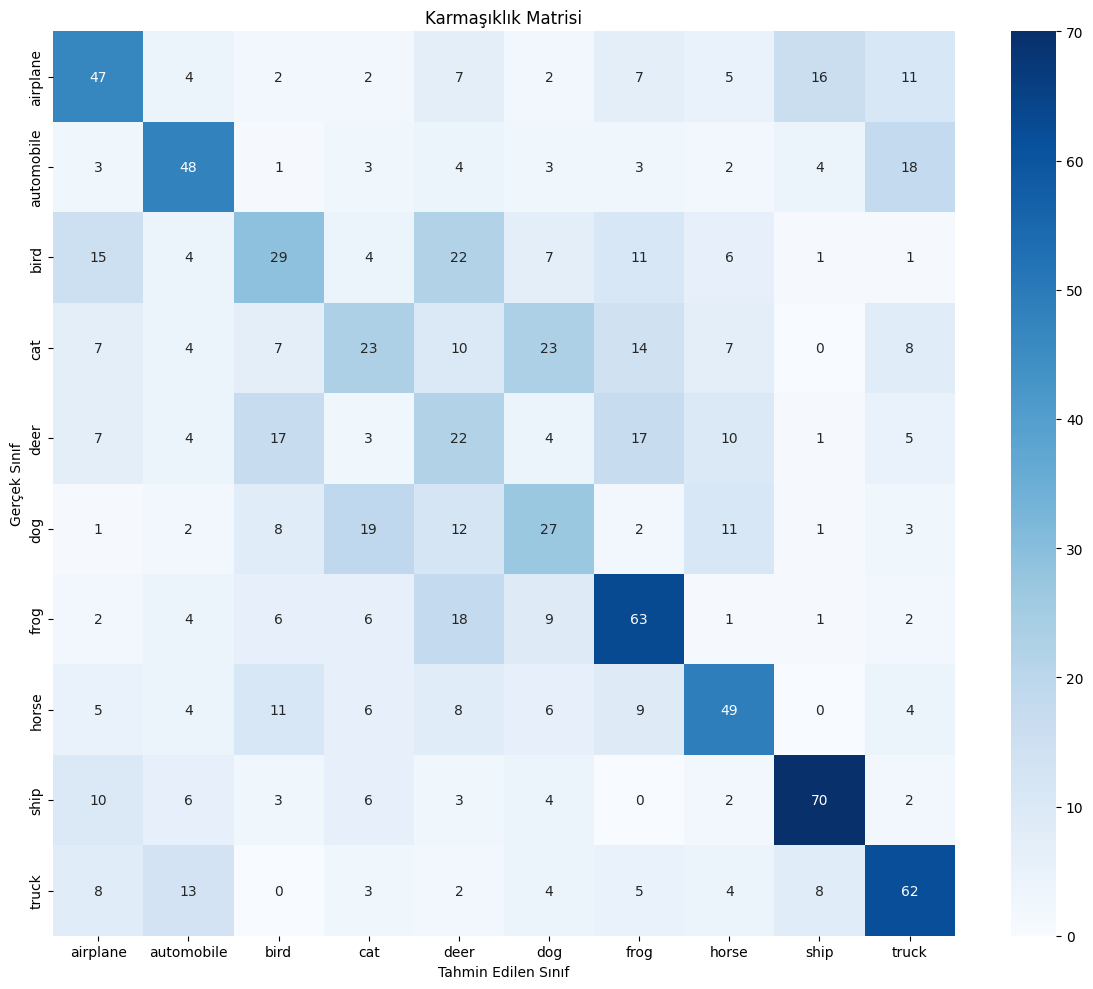


=== Detaylı Sınıflandırma Raporu ===
              precision    recall  f1-score   support

    airplane       0.45      0.46      0.45       103
  automobile       0.52      0.54      0.53        89
        bird       0.35      0.29      0.32       100
         cat       0.31      0.22      0.26       103
        deer       0.20      0.24      0.22        90
         dog       0.30      0.31      0.31        86
        frog       0.48      0.56      0.52       112
       horse       0.51      0.48      0.49       102
        ship       0.69      0.66      0.67       106
       truck       0.53      0.57      0.55       109

    accuracy                           0.44      1000
   macro avg       0.43      0.43      0.43      1000
weighted avg       0.44      0.44      0.44      1000


=== Sınıf Bazında Performans Metrikleri ===

airplane:
  Precision: 0.4476
  Recall: 0.4563
  F1-Score: 0.4519

automobile:
  Precision: 0.5161
  Recall: 0.5393
  F1-Score: 0.5275

bird:
  Precision: 0.

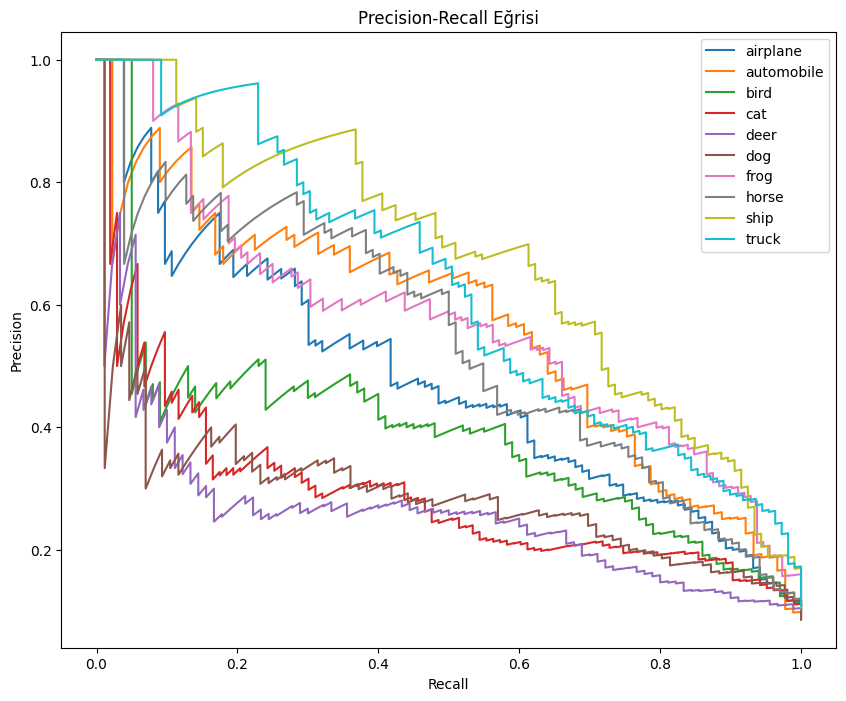

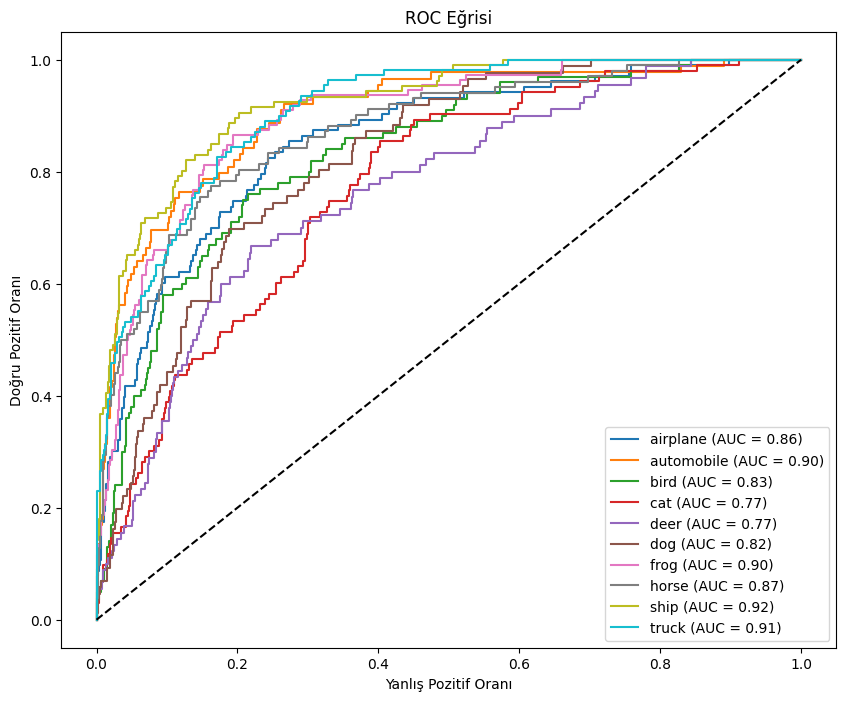

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

class CIFARPerformanceEvaluator:
    def __init__(self, y_true, y_pred, y_prob=None, class_names=None):
        """
        CIFAR-10 için performans değerlendirme sınıfı

        Parameters:
        - y_true: Gerçek etiketler
        - y_pred: Model tahminleri
        - y_prob: Sınıf olasılıkları (opsiyonel)
        - class_names: Sınıf isimleri
        """
        self.y_true = y_true
        self.y_pred = y_pred
        self.y_prob = y_prob
        self.class_names = class_names or [
            'airplane', 'automobile', 'bird', 'cat', 'deer',
            'dog', 'frog', 'horse', 'ship', 'truck'
        ]

    def compute_overall_metrics(self):
        """
        Genel performans metriklerini hesaplama
        """
        metrics = {
            'Accuracy': accuracy_score(self.y_true, self.y_pred),

            'Precision (Micro)': precision_score(self.y_true, self.y_pred, average='micro'),
            'Precision (Macro)': precision_score(self.y_true, self.y_pred, average='macro'),
            'Precision (Weighted)': precision_score(self.y_true, self.y_pred, average='weighted'),

            'Recall (Micro)': recall_score(self.y_true, self.y_pred, average='micro'),
            'Recall (Macro)': recall_score(self.y_true, self.y_pred, average='macro'),
            'Recall (Weighted)': recall_score(self.y_true, self.y_pred, average='weighted'),

            'F1-Score (Micro)': f1_score(self.y_true, self.y_pred, average='micro'),
            'F1-Score (Macro)': f1_score(self.y_true, self.y_pred, average='macro'),
            'F1-Score (Weighted)': f1_score(self.y_true, self.y_pred, average='weighted')
        }

        print("\n=== Genel Performans Metrikleri ===")
        for name, value in metrics.items():
            print(f"{name}: {value:.4f}")

        return metrics

    def plot_confusion_matrix(self):
        """
        Karmaşıklık matrisini görselleştirme
        """
        cm = confusion_matrix(self.y_true, self.y_pred)

        plt.figure(figsize=(12, 10))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=self.class_names,
            yticklabels=self.class_names
        )
        plt.title('Karmaşıklık Matrisi')
        plt.xlabel('Tahmin Edilen Sınıf')
        plt.ylabel('Gerçek Sınıf')
        plt.tight_layout()
        plt.show()

    def detailed_classification_report(self):
        """
        Detaylı sınıflandırma raporu
        """
        print("\n=== Detaylı Sınıflandırma Raporu ===")
        print(classification_report(
            self.y_true,
            self.y_pred,
            target_names=self.class_names
        ))

    def per_class_metrics(self):
        """
        Her sınıf için ayrıntılı metrikler
        """
        print("\n=== Sınıf Bazında Performans Metrikleri ===")
        for i, class_name in enumerate(self.class_names):
            # Bir sınıf için ikili sınıflandırma
            class_true = (self.y_true == i)
            class_pred = (self.y_pred == i)

            precision = precision_score(class_true, class_pred)
            recall = recall_score(class_true, class_pred)
            f1 = f1_score(class_true, class_pred)

            print(f"\n{class_name}:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")

    def plot_precision_recall_curve(self):
        """
        Precision-Recall eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            precision, recall, _ = precision_recall_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            plt.plot(recall, precision, label=self.class_names[i])

        plt.title('Precision-Recall Eğrisi')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

    def plot_roc_curve(self):
        """
        ROC eğrisi
        """
        if self.y_prob is None:
            print("Olasılık tahminleri gerekli.")
            return

        plt.figure(figsize=(10, 8))
        for i in range(len(self.class_names)):
            fpr, tpr, _ = roc_curve(
                (self.y_true == i).astype(int),
                self.y_prob[:, i]
            )
            roc_auc = auc(fpr, tpr)

            plt.plot(
                fpr, tpr,
                label=f'{self.class_names[i]} (AUC = {roc_auc:.2f})'
            )

        plt.plot([0, 1], [0, 1], 'k--')
        plt.title('ROC Eğrisi')
        plt.xlabel('Yanlış Pozitif Oranı')
        plt.ylabel('Doğru Pozitif Oranı')
        plt.legend()
        plt.show()

# Örnek kullanım
def run_performance_evaluation(y_true, y_pred, y_prob=None):
    # Performans değerlendiricisi oluşturma
    evaluator = CIFARPerformanceEvaluator(
        y_true,
        y_pred,
        y_prob
    )

    # Tüm analiz metodlarını çağırma
    evaluator.compute_overall_metrics()
    evaluator.plot_confusion_matrix()
    evaluator.detailed_classification_report()
    evaluator.per_class_metrics()

    # Olasılık tahminleri varsa ek analizler
    if y_prob is not None:
        evaluator.plot_precision_recall_curve()
        evaluator.plot_roc_curve()

# Ana fonksiyon
def main():
    from tensorflow.keras.datasets import cifar10
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC

    # Veri setini yükleme
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Görüntüleri düzleştirme ve normalize etme
    x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
    x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

    # Etiketleri düzleştirme
    y_train = y_train.ravel()
    y_test = y_test.ravel()

    # Veri ön işleme
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Alt küme seçimi
    x_train_subset, _, y_train_subset, _ = train_test_split(
        x_train_scaled, y_train, train_size=5000, random_state=42
    )

    # Model için parametre arama
    param_distributions = {
        'C': uniform(0.1, 10),
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
    }

    # RandomizedSearchCV kullanarak en iyi parametreleri bulma
    svm = SVC(random_state=42, probability=True)
    random_search = RandomizedSearchCV(svm, param_distributions, n_iter=10, cv=3, random_state=42, n_jobs=-1)
    random_search.fit(x_train_subset, y_train_subset)

    # En iyi modeli alma
    best_svm_model = random_search.best_estimator_

    # Tahminleri yapma
    y_pred = best_svm_model.predict(x_test_scaled[:1000])
    y_prob = best_svm_model.predict_proba(x_test_scaled[:1000])

    # Performans değerlendirmesi
    run_performance_evaluation(
        y_test[:1000],
        y_pred,
        y_prob
    )

if __name__ == '__main__':
    main()


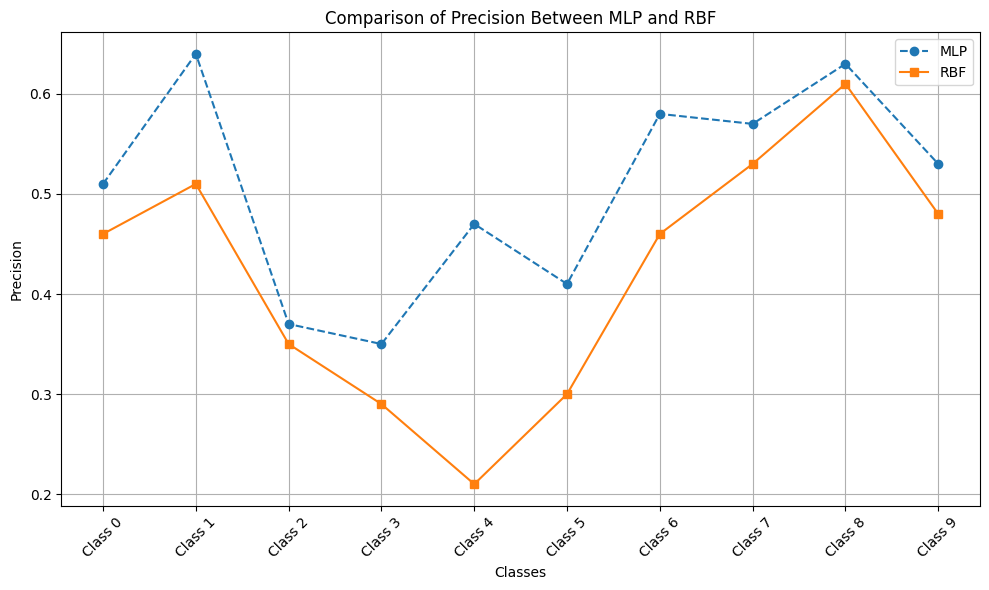

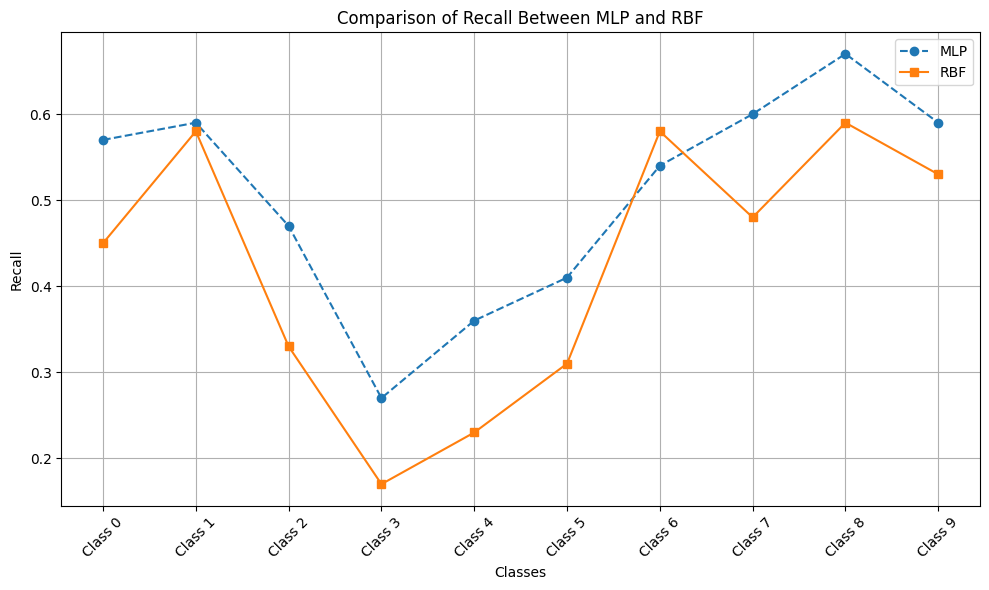

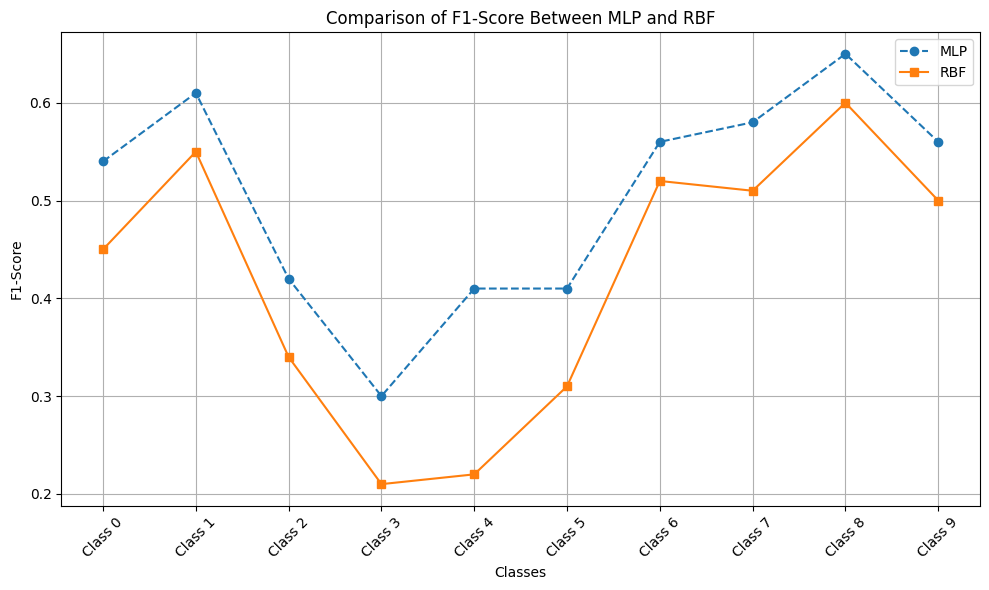

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Verileri hazırlama
classes = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4",
           "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

mlp_results = {
    "Precision": [0.51, 0.64, 0.37, 0.35, 0.47, 0.41, 0.58, 0.57, 0.63, 0.53],
    "Recall": [0.57, 0.59, 0.47, 0.27, 0.36, 0.41, 0.54, 0.60, 0.67, 0.59],
    "F1-Score": [0.54, 0.61, 0.42, 0.30, 0.41, 0.41, 0.56, 0.58, 0.65, 0.56],
}

rbf_results = {
    "Precision": [0.46, 0.51, 0.35, 0.29, 0.21, 0.30, 0.46, 0.53, 0.61, 0.48],
    "Recall": [0.45, 0.58, 0.33, 0.17, 0.23, 0.31, 0.58, 0.48, 0.59, 0.53],
    "F1-Score": [0.45, 0.55, 0.34, 0.21, 0.22, 0.31, 0.52, 0.51, 0.60, 0.50],
}

# DataFrame'e dönüştürme
mlp_df = pd.DataFrame(mlp_results, index=classes)
rbf_df = pd.DataFrame(rbf_results, index=classes)

# Görselleştirme
metrics = ["Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(classes, mlp_df[metric], label="MLP", marker="o", linestyle="--")
    plt.plot(classes, rbf_df[metric], label="RBF", marker="s", linestyle="-")
    plt.title(f"Comparison of {metric} Between MLP and RBF")
    plt.xlabel("Classes")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Performans Karsılastırması

MLP modeli, genel olarak RBF modeline göre daha iyi bir performans sergilemiştir. MLP’nin doğruluğu (%51), RBF’den (%43) belirgin şekilde yüksektir. Ayrıca, MLP daha dengeli bir sınıflandırma sunarken, RBF bazı sınıflarda ciddi performans düşüşleri yaşamıştır (özellikle "Cat" ve "Deer").

MLP, sınıf bazında daha tutarlı ve özellikle bazı sınıflarda (Class 1 ve Class 8) öne çıkarken, RBF yalnızca birkaç sınıfta (örneğin "Ship") görece daha iyi sonuçlar verebilmiştir. RBF’nin düşük recall ve precision değerleri, pozitif örnekleri yeterince iyi yakalayamadığını ve tahminlerinde hata yaptığını göstermektedir.

Sonuç olarak, mevcut durumda MLP, daha yüksek doğruluk ve dengeli performansıyla tercih edilmesi gereken modeldir.